In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

In [79]:
def quadraticMap(r,x):
    "Quadratic Map: f(x) = r(1/4 - x^2)"
    return r*(0.25 - x**2)

def logisticMap(r,x):
    return r*x*(1-x)

In [80]:
def couplingMat(eps,N):
    a = np.array([[1-eps],[eps/2]])
    b = np.zeros((1,N-3))
    c = np.array([[eps/2]])
    #row1 = np.array([[1-eps],[eps/2],[0],[0],[eps/2]])
    row1 = np.concatenate((a,b,c),axis=None)
    return toeplitz(row1)

In [81]:
quadraticMap(2.8,0.4)

0.2519999999999999

In [82]:
N = 100
eps = 0.7
r = 3.88

In [83]:
couplingMatrix = couplingMat(eps,N)

In [84]:
couplingMatrix

array([[0.3 , 0.35, 0.  , ..., 0.  , 0.  , 0.35],
       [0.35, 0.3 , 0.35, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.35, 0.3 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.3 , 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.35, 0.3 , 0.35],
       [0.35, 0.  , 0.  , ..., 0.  , 0.35, 0.3 ]])

In [111]:
x = np.random.rand(1,N)

In [112]:
x

array([[8.22588341e-01, 6.87129070e-01, 9.36327551e-01, 6.93325598e-01,
        9.90239851e-01, 1.65414749e-01, 7.20435957e-01, 3.99165225e-01,
        3.40174169e-01, 5.87525511e-01, 2.02334328e-01, 8.61296538e-01,
        9.36336988e-01, 4.46874275e-01, 9.75195144e-01, 4.35553094e-01,
        7.04762387e-01, 1.86767351e-02, 3.18219375e-02, 1.26909639e-01,
        3.48710406e-01, 3.42036585e-01, 6.80189272e-01, 3.42100978e-01,
        8.81526964e-02, 2.54973183e-01, 9.64104656e-01, 5.10719549e-01,
        8.62082097e-01, 4.59910235e-01, 4.20930487e-01, 1.26385000e-01,
        6.82159674e-01, 6.47779781e-02, 8.73017672e-01, 9.60885364e-01,
        8.06225670e-01, 8.92169524e-01, 6.66993789e-01, 4.82987238e-01,
        4.84023413e-01, 8.76336473e-01, 2.67126321e-01, 1.72322718e-01,
        6.53793806e-01, 6.27388016e-01, 4.48250967e-01, 1.46443520e-01,
        7.12683116e-02, 8.96798654e-01, 4.20250643e-01, 4.86330567e-04,
        5.18053218e-02, 1.11646853e-01, 1.22873451e-01, 8.572884

In [113]:
x = x.reshape(N,1)

In [114]:
fx = logisticMap(r,x)

In [115]:
d = logisticMap(r,x[0])

In [116]:
time = 1000
u = np.zeros((N,time))
u[:,[0]] = x
u

array([[0.82258834, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68712907, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93632755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30763916, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43072507, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45594845, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [117]:
# lattice dynamics
for n in range(time-1):
    u[:,[n+1]] = np.matmul(couplingMatrix,u[:,[n]])

In [118]:
u

array([[0.82258834, 0.64685363, 0.68307732, ..., 0.56173832, 0.56172486,
        0.56171142],
       [0.68712907, 0.82175928, 0.74034665, ..., 0.56023651, 0.56022519,
        0.56021388],
       [0.93632755, 0.7640574 , 0.82563666, ..., 0.55870236, 0.5586932 ,
        0.55868405],
       ...,
       [0.30763916, 0.24666654, 0.27669223, ..., 0.56598913, 0.5659695 ,
        0.5659499 ],
       [0.43072507, 0.39647318, 0.40668072, ..., 0.56462058, 0.56460296,
        0.56458535],
       [0.45594845, 0.57544423, 0.53779766, ..., 0.56320168, 0.56318612,
        0.56317057]])

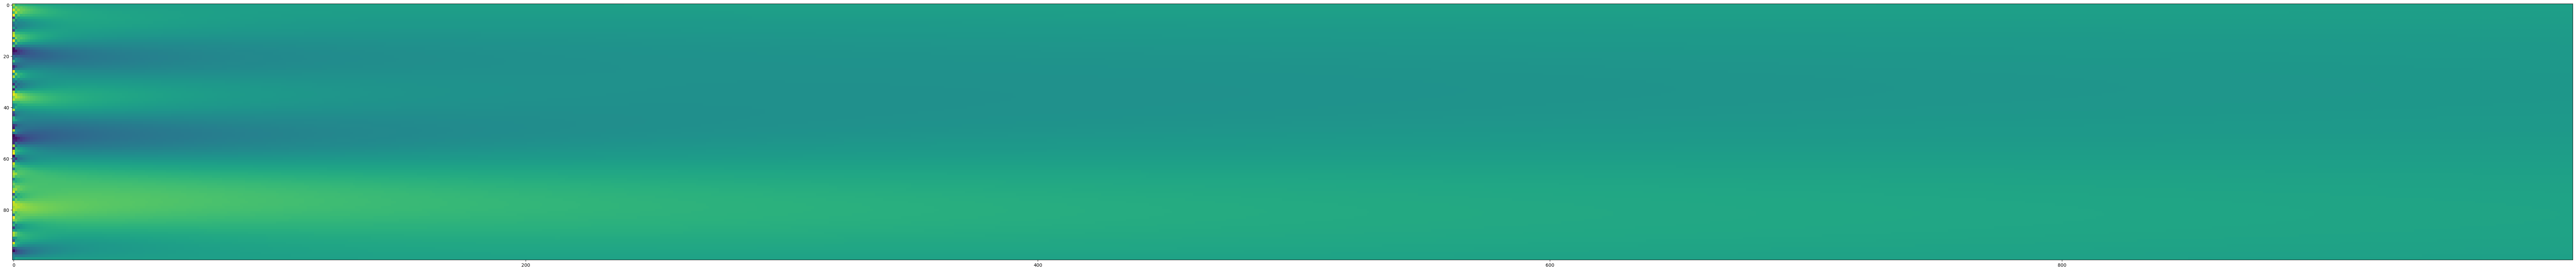

In [124]:
fig, ax = plt.subplots(1,1,figsize=(100,100))

ax.imshow(u,interpolation='nearest')

plt.show()